In [1]:
# https://github.com/rmcelreath/stat_rethinking_2023/blob/main/homework/week01.pdf

In [121]:
import matplotlib.pyplot as plt
import pymc as pm 
import arviz as az
import numpy as np
import scipy.stats as stats
import pandas as pd

In [122]:
def posterior_grid_approx(points=5, success=6, tosses=9, prior=lambda x:1):
    """
    success ~ Binomial(n,p)
    p ~ Uniform(0,1)
    """
    grid = np.linspace(0, 1, points)
    likelihood = stats.binom.pmf(success, tosses, grid)
    unnormalized_posterior = likelihood*prior(grid) 
    normalized_posterior =  unnormalized_posterior / sum(unnormalized_posterior) 
    return pd.DataFrame({'param_value':grid, 'p':normalized_posterior})

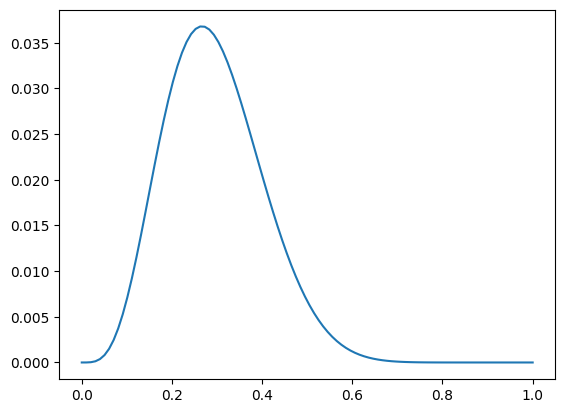

In [123]:
df = posterior_grid_approx(100, 4,15)
plt.plot(df.param_value, df.p)

In [125]:
samples = []
expected_samples=1000
while len(samples)<expected_samples:
    index = np.random.choice(range(0,len(df)))
    flip=np.random.binomial(1,df.iloc[index].p)
    if flip > 0.5:
        samples.append(np.random.binomial(5,df.iloc[index].param_value))



In [127]:
sum(np.array(samples) >= 3)/len(samples)

0.19

In [138]:
grouped = pd.DataFrame({'a':samples, 'b':1}).groupby('a').sum()
grouped['b'] = grouped['b']/sum(grouped['b'])
grouped

,b
a,
0,0.213
1,0.341
2,0.256
3,0.151
4,0.033
5,0.006


In [107]:
likelihood=[]
for tosses in range(5, 21):
    likelihood.append(stats.binom.pmf(k=5, n=tosses, p=0.7))

df3 = pd.DataFrame({'param_value':range(5, 21), 'p':likelihood})

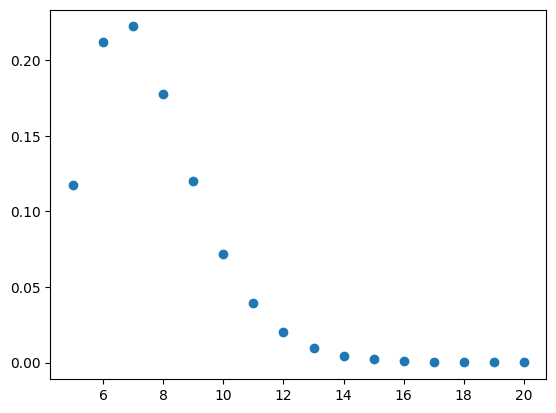

In [110]:
plt.plot(df3.param_value, df3.p/sum(df3.p), 'o')